In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/likhitayerra/Downloads/BAYC.ipynb (combined_df).csv")
df.head()

,DateTime (UTC),Txn Hash,Blockno,UnixTimestamp,Action,Buyer,NFT,Token ID,Type,Quantity,...,FurOccurrence,Eyes,EyesOccurrence,Hat,HatOccurrence,Earring,EarringOccurrence,Clothes,ClothesOccurrence,TraitsCount
0,2021-05-04 00:02:01,0xd298e08dbda0b8e632d60245e88124b9720b7981a71c...,12364368,1620086521,Bought,0x70f137c927ac74ea769a92b94a8ea6e11b15116b,BoredApeYachtClub,6260,721,1,...,636.0,Bored,1714.0,Ww2 Pilot Helm,110,Silver Hoop,7023,Sleeveless Logo T,144,6
1,2021-05-10 22:04:09,0x34d9085a4d18bbdc2a94659bff1153f881da4a085e4a...,12409253,1620684249,Bought,0x43eb8d74b8caa0e7c5bb819d74185de4039ed7da,BoredApeYachtClub,6260,721,1,...,636.0,Bored,1714.0,Ww2 Pilot Helm,110,Silver Hoop,7023,Sleeveless Logo T,144,6
2,2021-06-01 07:48:41,0xc1b16b107127ee98d422535d98baa57b9fb6e2006782...,12547305,1622533721,Bought,0x95e068b35576ede4df0543ec0c00669dafafe771,BoredApeYachtClub,6260,721,1,...,636.0,Bored,1714.0,Ww2 Pilot Helm,110,Silver Hoop,7023,Sleeveless Logo T,144,6
3,2021-06-21 06:09:00,0xcf76badadae3009edb40492e05577c873e8f3b7ae422...,12675945,1624255740,Bought,0x3c6ad2dd77b6ac3dac138279f0a4a98270d08a74,BoredApeYachtClub,6260,721,1,...,636.0,Bored,1714.0,Ww2 Pilot Helm,110,Silver Hoop,7023,Sleeveless Logo T,144,6
4,2021-12-18 00:50:12,0xace696fa36588fe7496f55ccf047041890c4eb61adb1...,13825939,1639788612,Bought,0x320baaaf67f1f5c5d37e0c54d808af46faf6d348,BoredApeYachtClub,6260,721,1,...,636.0,Bored,1714.0,Ww2 Pilot Helm,110,Silver Hoop,7023,Sleeveless Logo T,144,6


In [3]:
from prophet import Prophet

# Assuming `df` is your DataFrame and it's already sorted by date
df.rename(columns={'DateTime (UTC)': 'ds', 'ETH($)': 'y'}, inplace=True)

/Users/likhitayerra/micromamba/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd

# Calculate the IQR
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for what is considered an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['y'] < lower_bound) | (df['y'] > upper_bound)]


# Dropping outliers 
df_no_outliers = df[~((df['y'] < lower_bound) | (df['y'] > upper_bound))]

# Display information about outliers
print(f"Number of outliers detected: {outliers.shape[0]}")
print(f"Indices of outlier rows: {outliers.index.tolist()}")


Number of outliers detected: 1488
Indices of outlier rows: [23, 27, 38, 58, 177, 192, 206, 232, 255, 293, 310, 385, 394, 417, 420, 430, 473, 562, 571, 573, 614, 619, 704, 715, 747, 813, 858, 868, 879, 908, 934, 954, 996, 1017, 1075, 1083, 1084, 1122, 1149, 1214, 1221, 1292, 1338, 1339, 1356, 1385, 1387, 1446, 1459, 1460, 1475, 1531, 1545, 1548, 1549, 1567, 1616, 1621, 1640, 1646, 1679, 1725, 1765, 1776, 1777, 1792, 1801, 1802, 1807, 1856, 1874, 1922, 1933, 2065, 2100, 2116, 2117, 2156, 2167, 2241, 2252, 2257, 2258, 2369, 2374, 2376, 2393, 2453, 2465, 2468, 2488, 2494, 2526, 2564, 2570, 2571, 2572, 2602, 2653, 2654, 2687, 2701, 2702, 2718, 2756, 2796, 2857, 2869, 2885, 2929, 2935, 2941, 3054, 3070, 3081, 3102, 3107, 3158, 3167, 3175, 3180, 3183, 3201, 3220, 3264, 3266, 3274, 3278, 3279, 3286, 3306, 3314, 3394, 3395, 3427, 3460, 3513, 3556, 3607, 3638, 3642, 3721, 3803, 3814, 3821, 3832, 3843, 3861, 3862, 3873, 3881, 3891, 3902, 3925, 3928, 3932, 3939, 3980, 3991, 3998, 4014, 4071, 4091,

Number of outliers detected: 1488
                        ds                                           Txn Hash  \
0      2021-05-04 00:02:01  0xd298e08dbda0b8e632d60245e88124b9720b7981a71c...   
1      2021-05-10 22:04:09  0x34d9085a4d18bbdc2a94659bff1153f881da4a085e4a...   
2      2021-06-01 07:48:41  0xc1b16b107127ee98d422535d98baa57b9fb6e2006782...   
3      2021-06-21 06:09:00  0xcf76badadae3009edb40492e05577c873e8f3b7ae422...   
4      2021-12-18 00:50:12  0xace696fa36588fe7496f55ccf047041890c4eb61adb1...   
...                    ...                                                ...   
27291  2024-03-04 03:41:59  0x0225506cc03ddc85f8e2a265b5ed986e4f5eef4a82da...   
27292  2024-03-06 09:38:23  0x05993267edd2efb28199348d83010a6065674e8e29ae...   
27293  2024-03-06 19:47:11  0x9a6978974c3b276e4c9e6defdbd7a34c539957cc85fc...   
27295  2024-03-08 21:50:11  0xee7c22ca66e01c3ea56ec2451513b4c622698f7d3f4f...   
27296  2024-03-09 05:16:23  0x652f4588db1178fff071fbbd2425ac9ca3ccc6b3e33b.

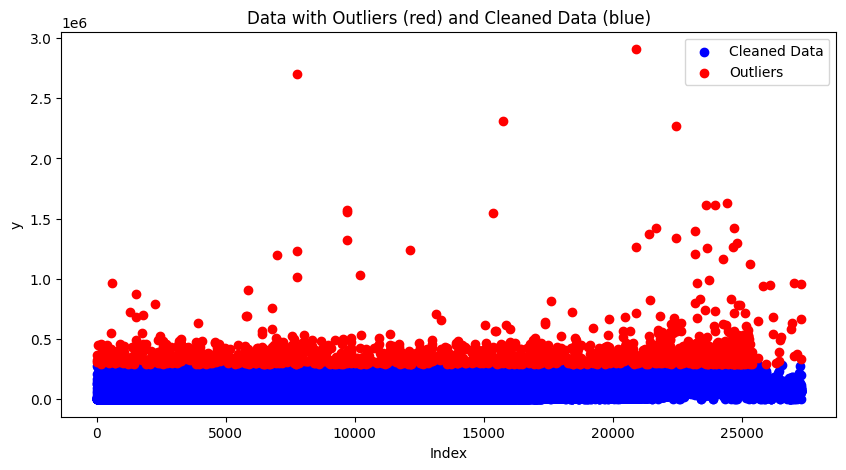

In [5]:
import pandas as pd
import numpy as np



# Calculate the IQR
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for what is considered an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['y'] < lower_bound) | (df['y'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")

# Remove outliers
df_no_outliers = df[~((df['y'] < lower_bound) | (df['y'] > upper_bound))]


# Display the cleaned DataFrame
print(df_no_outliers)

# You may want to visualize the cleaned data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df_no_outliers.index, df_no_outliers['y'], c='blue', label='Cleaned Data')
plt.scatter(outliers.index, outliers['y'], c='red', label='Outliers')
plt.legend()
plt.title("Data with Outliers (red) and Cleaned Data (blue)")
plt.xlabel("Index")
plt.ylabel("y")
plt.show()


21:53:11 - cmdstanpy - INFO - Chain [1] start processing
21:53:21 - cmdstanpy - INFO - Chain [1] done processing
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


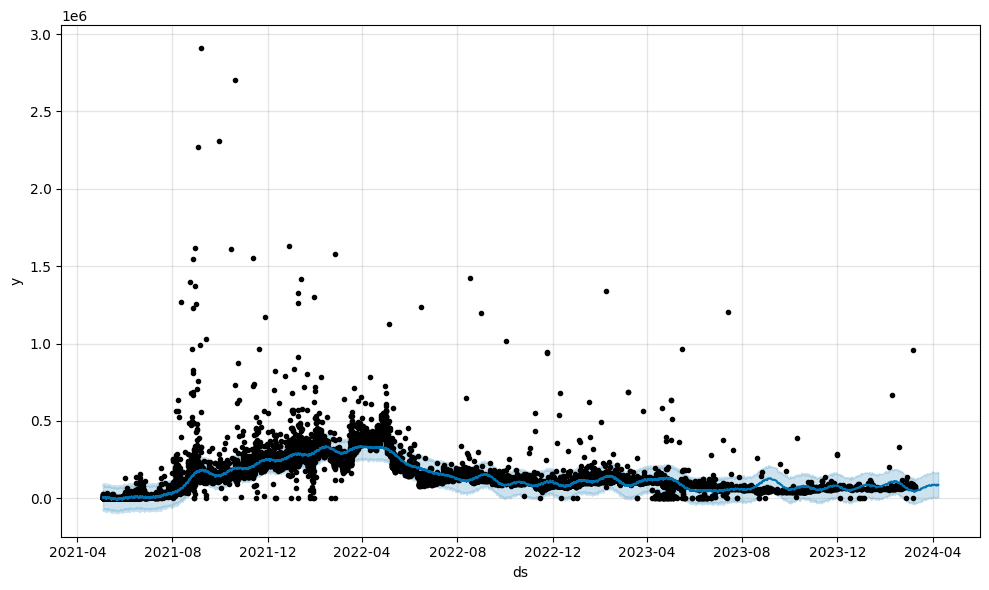

In [6]:


# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)  # Consider turning on daily_seasonality if you have daily data
model.fit(df[['ds', 'y']])

# Create a future dataframe for predictions, let's say for the next 30 days
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)

In [7]:
df.columns

Index(['ds', 'Txn Hash', 'Blockno', 'UnixTimestamp', 'Action', 'Buyer', 'NFT',
       'Token ID', 'Type', 'Quantity', 'Market', 'Price(ETH)', 'y', 'Owner',
       'OnlyApe', 'BAYCs in wallet', 'RecentSale', 'RecentSaleUSD',
       'RecentSaleDate', 'Platform', 'Floorprice_att', 'Price-floor',
       'highest_offer', 'Highest_offerUSD', 'Floorprice_att2',
       'highest_listing', 'highest_listingUSD', 'Floorprice_att3',
       'Trait rarity', 'Average Rarity', 'Average Rarity_NN',
       'Statistical Rarity', 'Background', 'BackgroundOccurrence', 'Mouth',
       'MouthOccurrence', 'Fur', 'FurOccurrence', 'Eyes', 'EyesOccurrence',
       'Hat', 'HatOccurrence', 'Earring', 'EarringOccurrence', 'Clothes',
       'ClothesOccurrence', 'TraitsCount'],
      dtype='object')

In [8]:
df.dtypes

ds                       object
Txn Hash                 object
Blockno                   int64
UnixTimestamp             int64
Action                   object
Buyer                    object
NFT                      object
Token ID                  int64
Type                      int64
Quantity                  int64
Market                   object
Price(ETH)              float64
y                       float64
Owner                    object
OnlyApe                  object
BAYCs in wallet           int64
RecentSale              float64
RecentSaleUSD           float64
RecentSaleDate           object
Platform                 object
Floorprice_att          float64
Price-floor             float64
highest_offer           float64
Highest_offerUSD        float64
Floorprice_att2         float64
highest_listing         float64
highest_listingUSD      float64
Floorprice_att3         float64
Trait rarity            float64
Average Rarity          float64
Average Rarity_NN       float64
Statisti

In [9]:
# Convert 'ds' column to datetime format
df['ds'] = pd.to_datetime(df['ds'])



In [10]:
# List of potential numerical features
numerical_features = ['Blockno', 'UnixTimestamp', 'Token ID', 'Type', 'Quantity', 'BAYCs in wallet',
                      'RecentSale', 'RecentSaleUSD', 'Floorprice_att', 'Price-floor', 'highest_offer',
                      'Highest_offerUSD', 'Floorprice_att2', 'highest_listing', 'highest_listingUSD',
                      'Floorprice_att3', 'Trait rarity', 'Average Rarity', 'Average Rarity_NN',
                      'Statistical Rarity', 'BackgroundOccurrence', 'MouthOccurrence', 'FurOccurrence',
                      'EyesOccurrence', 'HatOccurrence', 'EarringOccurrence', 'ClothesOccurrence',
                      'TraitsCount']  # Add more features as needed

# Calculate correlation with 'ETH($)'
correlation_matrix = df[numerical_features + ['y']].corr()
eth_correlation = correlation_matrix['y'].sort_values(ascending=False)

# Display the correlation values
print(eth_correlation)


y                       1.000000
RecentSaleUSD           0.473042
RecentSale              0.459231
Floorprice_att          0.331153
UnixTimestamp           0.254269
Blockno                 0.246769
Highest_offerUSD        0.088331
highest_offer           0.085686
TraitsCount             0.004907
highest_listingUSD     -0.000540
Floorprice_att3        -0.000540
highest_listing        -0.000595
BackgroundOccurrence   -0.003577
ClothesOccurrence      -0.004009
BAYCs in wallet        -0.004135
HatOccurrence          -0.004770
Token ID               -0.007369
Statistical Rarity     -0.009239
EarringOccurrence      -0.013653
MouthOccurrence        -0.014420
EyesOccurrence         -0.016193
Price-floor            -0.021506
Average Rarity_NN      -0.024664
Average Rarity         -0.025511
FurOccurrence          -0.034798
Trait rarity           -0.052864
Type                         NaN
Quantity                     NaN
Floorprice_att2              NaN
Name: y, dtype: float64


21:54:30 - cmdstanpy - INFO - Chain [1] start processing
21:54:46 - cmdstanpy - INFO - Chain [1] done processing
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


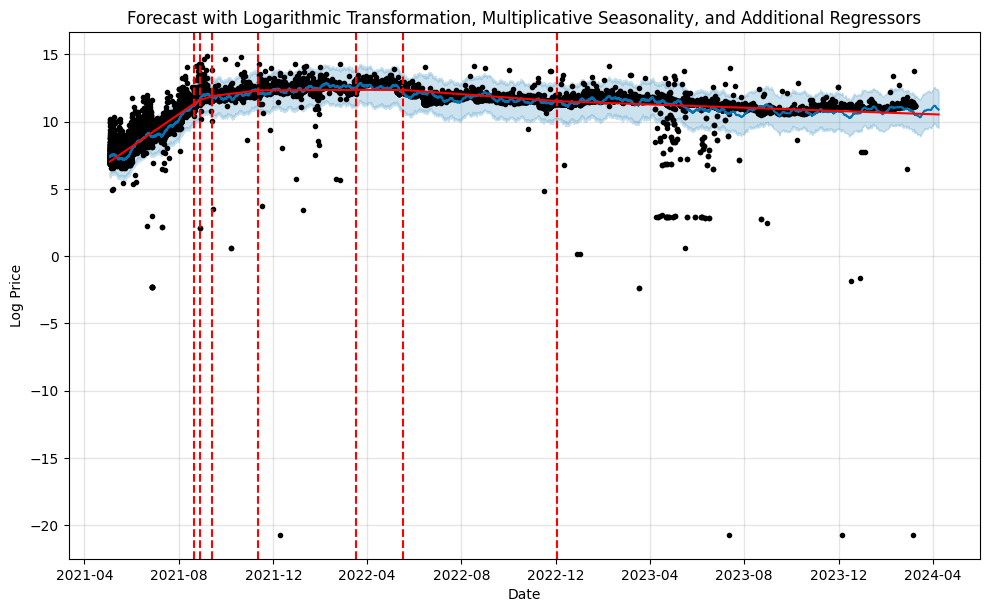

/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

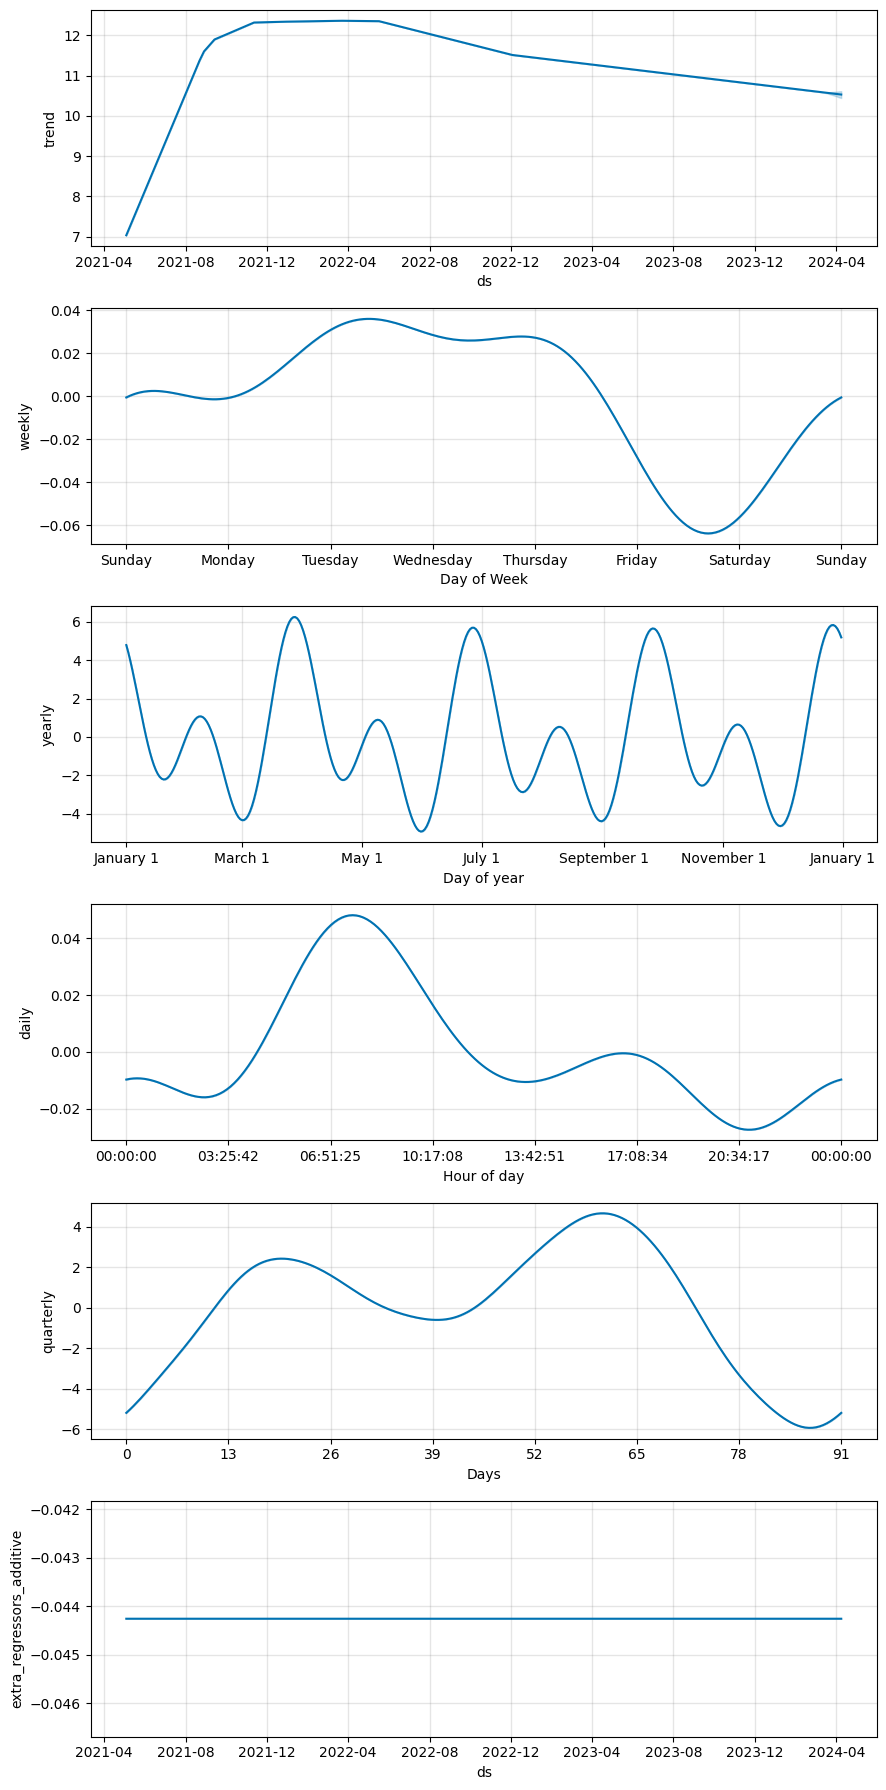

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

def create_prophet_model_m3(df, selected_features):
    # Copy dataframe and apply logarithmic transformation to the target variable
    logdf = df.copy()
    logdf['y'] = np.log(logdf['y'] + 1e-9)  # Adding a small constant to avoid taking log of zero

    # Initialize Prophet model with multiplicative seasonality
    m3 = Prophet(seasonality_mode='additive', yearly_seasonality=True, interval_width=0.95, changepoint_prior_scale=0.01)

    # Add custom seasonality
    m3.add_seasonality(name='quarterly', period=91.25, fourier_order=8)

    # Add selected features as regressors
    for feature in selected_features:
        m3.add_regressor(feature)

    # Fit the model to the log-transformed data
    m3.fit(logdf[['ds', 'y'] + selected_features])

    # Create future dataframe for forecasting
    future = m3.make_future_dataframe(periods=30, freq='D')
    
    # Add future values for regressors
    for feature in selected_features:
        # Assuming future values are the same as the last known value for simplicity
        future[feature] = logdf[feature].iloc[-1]

    # Make predictions
    forecast = m3.predict(future)
    
    # Plot the forecast
    fig = m3.plot(forecast)
    # Add changepoints to the plot
    add_changepoints_to_plot(fig.gca(), m3, forecast)
    plt.title('Forecast with Logarithmic Transformation, Multiplicative Seasonality, and Additional Regressors')
    plt.xlabel('Date')
    plt.ylabel('Log Price')
    plt.show()

    # Plot the forecast components
    m3.plot_components(forecast)
    plt.show()

    # Back-transform the forecasted values to the original scale
    forecast['yhat'] = np.exp(forecast['yhat']) - 1e-9
    forecast['yhat_lower'] = np.exp(forecast['yhat_lower']) - 1e-9
    forecast['yhat_upper'] = np.exp(forecast['yhat_upper']) - 1e-9


    return forecast


selected_features = ['RecentSaleUSD', 'RecentSale', 'Floorprice_att','Trait rarity']

# Calling the function with the provided dataframe and selected features
forecast = create_prophet_model_m3(df, selected_features)


In [13]:
# Access the predicted results
predicted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# You can now print or use the predicted results
print(predicted_values)

                       ds          yhat    yhat_lower     yhat_upper
0     2021-05-04 00:02:01   1585.265724    400.607299    6484.032965
1     2021-05-04 00:10:58   1586.710417    399.295867    5482.546719
2     2021-05-04 00:14:11   1587.170901    398.847571    5666.842006
3     2021-05-04 00:15:17   1587.321278    401.618348    5950.254288
4     2021-05-04 00:15:34   1587.359427    442.501765    6724.243294
...                   ...           ...           ...            ...
25248 2024-04-04 05:16:23  70237.356086  17775.901286  258726.312617
25249 2024-04-05 05:16:23  62803.384378  15342.922506  241384.514381
25250 2024-04-06 05:16:23  59017.033802  14837.374754  254080.602393
25251 2024-04-07 05:16:23  57533.950250  15390.075532  233940.522211
25252 2024-04-08 05:16:23  53896.315434  13839.867208  209366.256683

[25253 rows x 4 columns]
